In [2]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()



4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(f"Training sample: \n {train_data} \n")

Training sample: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] 



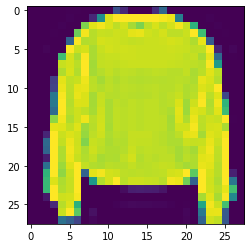

In [4]:

import matplotlib.pyplot as plt
#imshow is basically for showing images

plt.imshow(train_data[7])

In [6]:
class_names =['T-shirt/top', 'Trousers', 'Pullover', 'Dress' ,'Coat', 'Sandal', 'Sneaker', 'Bag', 'Ankle boot']



Text(0.5, 1.0, 'Sandal')

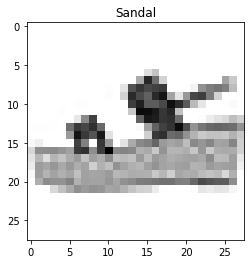

In [8]:
our_idx = 12

plt.imshow(train_data[our_idx], cmap = plt.cm.binary)
plt.title(class_names[train_labels[our_idx]])

In [12]:
tf.random.set_seed(42)



model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),                     
        tf.keras.layers.Dense(4, activation = "relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


hist = model.fit(train_data, train_labels, epochs=10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [24]:
#normalizing the data
train_data_norm = train_data / 255.0

test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()


lrs = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-3 * 10 ** (epoch/20) )

hist = model.fit(train_data_norm, train_labels, epochs = 40, validation_data = (test_data_norm, test_labels), callbacks=[lrs])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6741 - accuracy: 0.7568 - val_loss: 0.7122 - val_accuracy: 0.7476 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6758 - accuracy: 0.7575 - val_loss: 0.7269 - val_accuracy: 0.7449 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6760 - accuracy: 0.7576 - val_loss: 0.7151 - val_accuracy: 0.7446 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6781 - accuracy: 0.7566 - val_loss: 0.7196 - val_accuracy: 0.7464 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6796 - accuracy: 0.7558 - val_loss: 0.7146 - val_accuracy: 0.7501 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6816 - accuracy: 0.7538 - val_loss: 0.7456 - val_accuracy: 0.7395 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

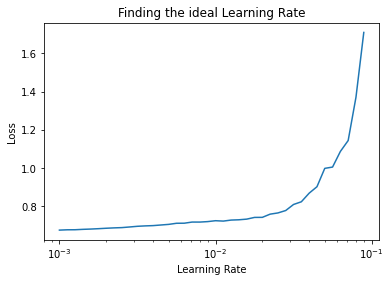

In [26]:
lrt = 1e-3 * (10 **(tf.range(40)/20)) 

import matplotlib.pyplot as plt

plt.semilogx(lrt, hist.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal Learning Rate')

In [31]:
model2 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr = 0.001),
               metrics = ['accuracy'])
model2.fit(train_data_norm, train_labels, epochs =40, validation_data = (test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1766 - accuracy: 0.5501 - val_loss: 0.8390 - val_accuracy: 0.6967
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7418 - accuracy: 0.7356 - val_loss: 0.7360 - val_accuracy: 0.7377
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6635 - accuracy: 0.7674 - val_loss: 0.6743 - val_accuracy: 0.7612
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6280 - accuracy: 0.7834 - val_loss: 0.6537 - val_accuracy: 0.7779
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6068 - accuracy: 0.7909 - val_loss: 0.6494 - val_accuracy: 0.7734
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5960 - accuracy: 0.7951 - val_loss: 0.6414 - val_accuracy: 0.7810
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5879 - accuracy: 0.7973 - val_loss: 0.6110 - val_accuracy:

In [47]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np


def make_confusion(yTrue, yPred, classes=None, figsize=(10,10)):

  cm = confusion_matrix(yTrue, yPred)
  cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis]

  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel = "Predicted Label",
         ylabel = "True Label",
         xticks = np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels = labels,
         yticklabels = labels)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(10)
  ax.xaxis.label.set_size(10)
  ax.title.set_size(10)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j ]}  ({cm_norm[i, j] * 100})", 
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > threshold else "black", 
             size =15)

In [42]:
preds = model2.predict(test_data_norm)
#getting the index of our predictions with out classes
yPreds = preds.argmax(axis=1)

yPreds

array([9, 2, 1, ..., 8, 1, 5])

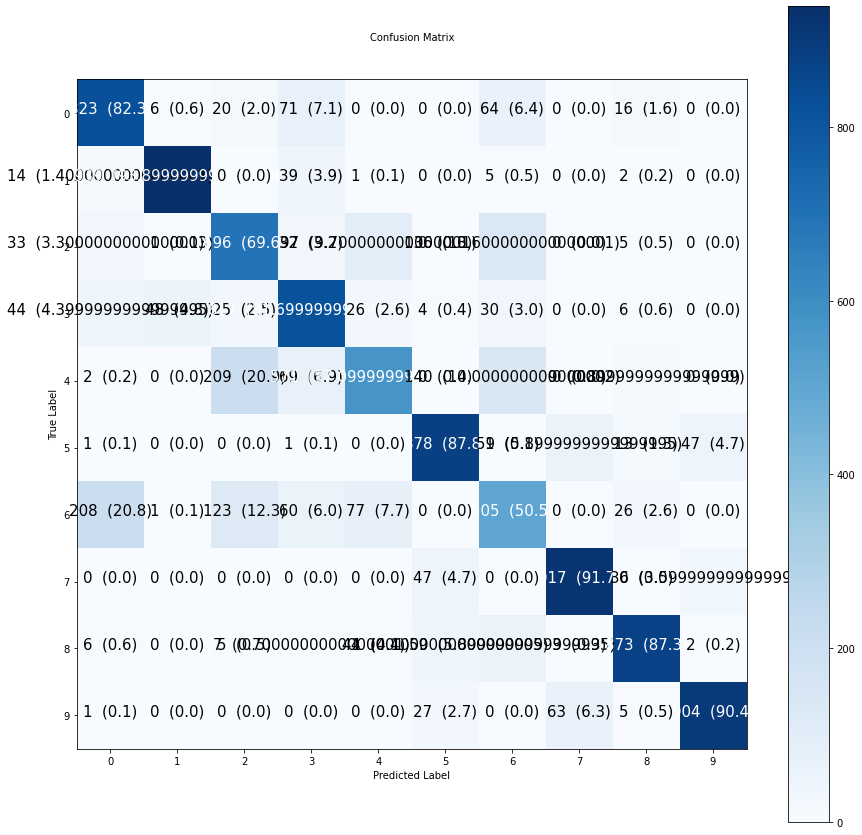

In [48]:
make_confusion(test_labels, yPreds, class_names, figsize=(15,15))

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, yPreds)

array([[823,   6,  20,  71,   0,   0,  64,   0,  16,   0],
       [ 14, 939,   0,  39,   1,   0,   5,   0,   2,   0],
       [ 33,   1, 696,  32,  97,   0, 136,   0,   5,   0],
       [ 44,  48,  25, 817,  26,   4,  30,   0,   6,   0],
       [  2,   0, 209,  69, 571,   0, 140,   0,   9,   0],
       [  1,   0,   0,   1,   0, 878,   1,  59,  13,  47],
       [208,   1, 123,  60,  77,   0, 505,   0,  26,   0],
       [  0,   0,   0,   0,   0,  47,   0, 917,   0,  36],
       [  6,   0,   5,   7,   4,  41,  59,   3, 873,   2],
       [  1,   0,   0,   0,   0,  27,   0,  63,   5, 904]])